In [2]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#EDA Task:

Analyzing the penguine dataset:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Now we are importing the dataset, and making it more readable.

In [3]:
df = pd.read_csv('penguins.csv') ## to read the dataset
df ## to print the dataset but the 1st and last five only

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [4]:
df = pd.read_csv('penguins.csv')
new_df = df.dropna() 

# print(new_df.to_string())

In [5]:
# print(new_df.shape)
print(new_df.describe) # df.describe() for numerical summary
df.head()


<bound method NDFrame.describe of        species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [6]:
df_clean = df.dropna(subset=['bill_length_mm', 'flipper_length_mm']) # 
df_clean['sex'] = df_clean['sex'].fillna('Unknown') ## filling the null values with unknown
print(df_clean.isnull().sum()) # Should be 0 for analysis columns
print(df_clean.species.value_counts())
df_clean.tail()## to print the last five rows in the dataframe.

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female


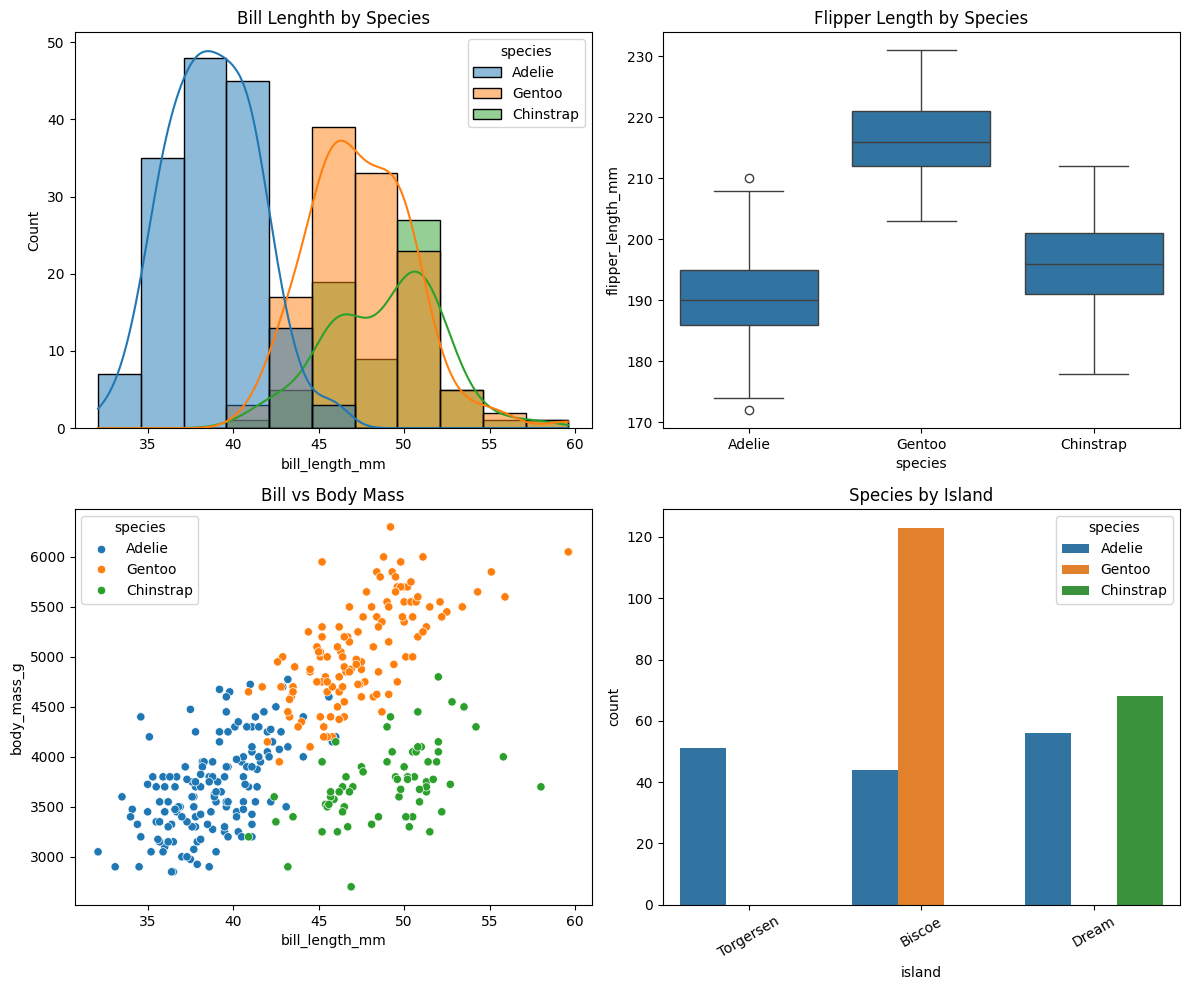

In [7]:
# 3. Visualizations (fill in)
fig, ax = plt.subplots(2, 2, figsize=(12,10))

# A) Histogram with KDE
sns.histplot(data=df_clean, x="bill_length_mm", hue="species", kde=True, ax=ax[0, 0])
ax[0,0].set_title("Bill Lenghth by Species")

# B) Boxplot
sns.boxplot(data=df_clean, x='species', y='flipper_length_mm',
ax=ax[0,1])
ax[0,1].set_title('Flipper Length by Species')

# C) Scatterplot
sns.scatterplot(data=df_clean, x='bill_length_mm',
y='body_mass_g', hue='species', ax=ax[1,0])
ax[1,0].set_title('Bill vs Body Mass')

# D) Countplot
sns.countplot(data=df_clean, x='island', hue='species',
ax=ax[1,1])
ax[1,1].set_title('Species by Island') # Rotate if overlapping:
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

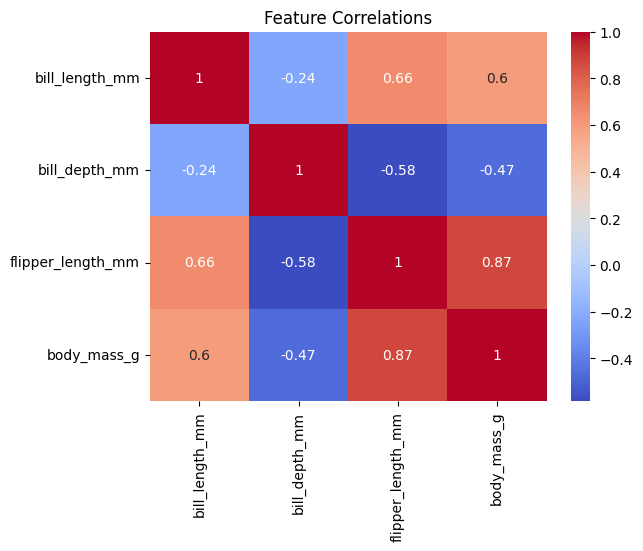

In [8]:
# 4. Bonus: Correlations
corr = df_clean[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

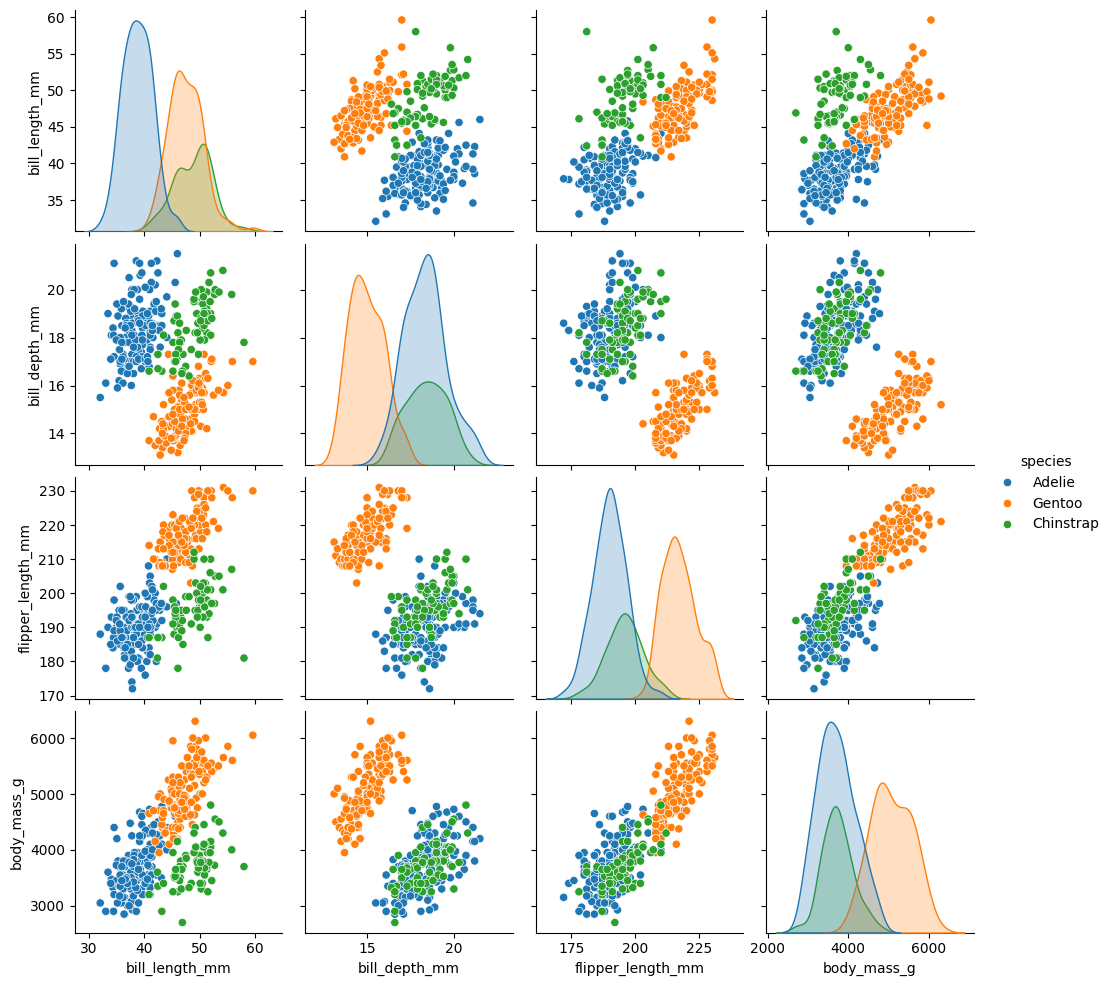

In [9]:
# Pairplot: 
sns.pairplot(df_clean, hue="species") ## "hue" used for coloring the graph across different category

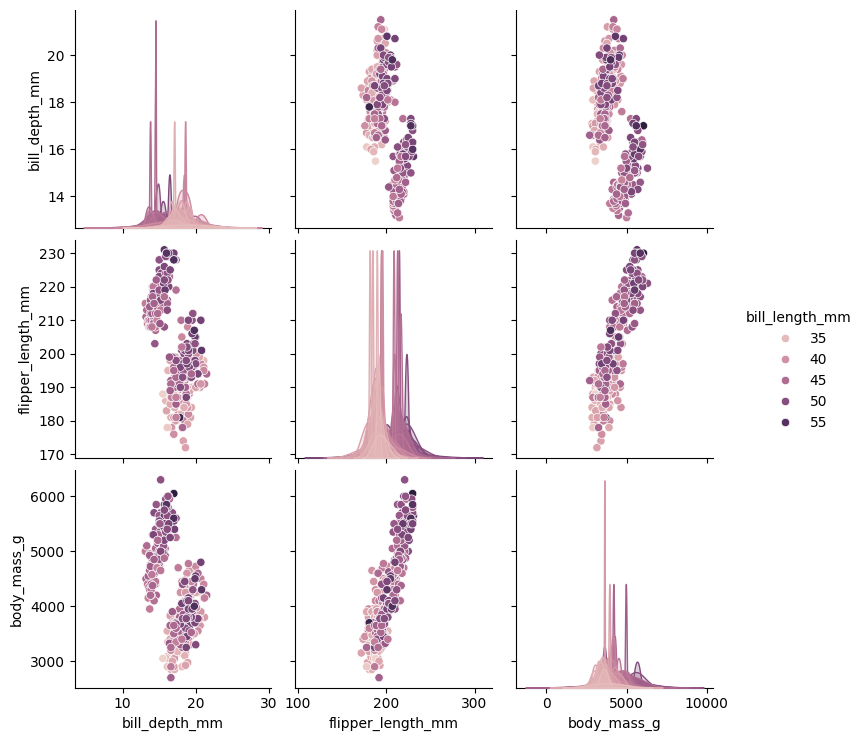

In [10]:
# Just doing another fancy colour combination
sns.pairplot(df_clean, hue ="bill_length_mm")

Hypothesis 1: There is no difference in mean body mass between male and female penguins.

**Observations and implications**
**Insight 1:** based on the 4th graphic, we can conclude that the Adelie species can be found in every island in the dataset.<br>
**Insight 2:** based on the 2th graphic, the Gentoo species has overall a bigger flipper length and weight.<br>
**Insight 3:** based on the 1st and 2nd graphics, Adelie species have the smallest bill and flipper lengths.

In [11]:
male_body_mass = df_clean[df_clean["sex"] == "male"]
male_mean = np.mean(male_body_mass ["body_mass_g"])
print (f"Male body mass mean{male_mean}")
female_body_mass = df_clean[df_clean["sex"] == "female"]
female_mean = np.mean(female_body_mass ["body_mass_g"])
print (f"Female body mass mean{female_mean}")

Male body mass mean4545.684523809524
Female body mass mean3862.2727272727275


Text(0.5, 1.0, 'Hypothesis 1')

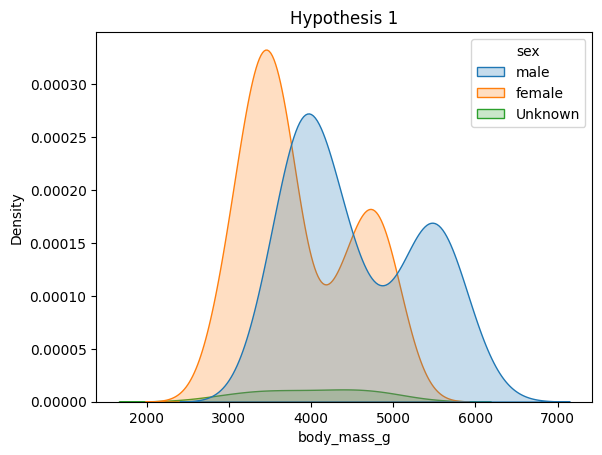

In [12]:
graph1 = sns.kdeplot(data=df_clean, x="body_mass_g", hue="sex", fill=True)
graph1.set_title("Hypothesis 1") 

As proven, we can conclude that there's a difference between the mean body mass of male and female penguins. 
Hence, the hypothesis holds **false.**

Hypothesis 2: The flipper length has a positive impact on body mass.

Text(0.5, 1.0, 'Hypothesis 2')

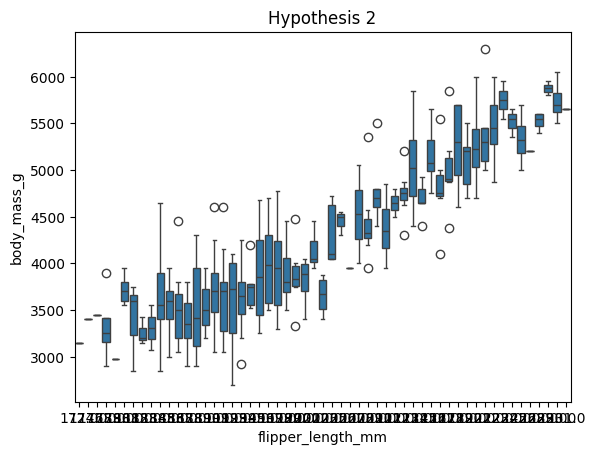

In [13]:
# Just a fancy one boxplot, testing the the graph, though this is not the best one for this hypo.
graph2 = sns.boxplot(data=df_clean, x="flipper_length_mm", y="body_mass_g", fill = True)
graph2.set_title("Hypothesis 2") 

Text(0.5, 1.0, 'Hypothesis 2')

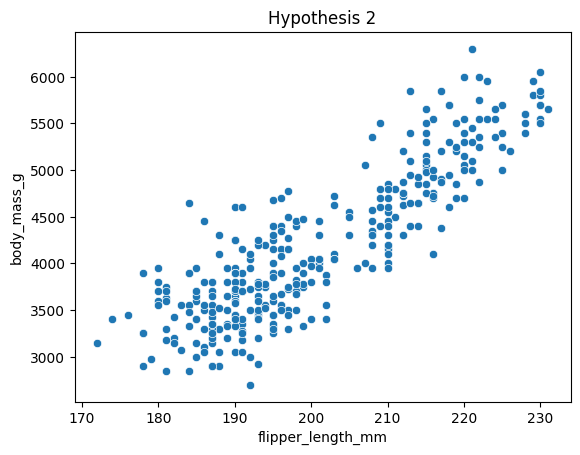

In [14]:
graph2 = sns.scatterplot(data=df_clean, x='flipper_length_mm', y='body_mass_g')
graph2.set_title("Hypothesis 2") 